In [1]:
import numpy as np
import time
import torch
from torch import nn,optim
import sys
import matplotlib.pyplot as plt
import torchvision
%matplotlib inline

In [11]:
def get_data_ch7():
    data = np.genfromtxt(
        r'F:\study\ml\DataSet\airfoil_self_noise\airfoil_self_noise.dat',
        delimiter='\t')
    data = (data - data.mean(axis=0)) / data.std(axis=0)
    return torch.tensor(data[:1500, :-1], dtype=torch.float32),\
    torch.tensor(data[:1500,-1],dtype=torch.float32)

In [12]:
features,labels=get_data_ch7()

In [22]:
def train_pytorch_ch7(optimizer_fn,optimizer_hyperparams,features,labels,batch_size=10,
                     num_epochs=2):
    net=nn.Sequential(
        nn.Linear(features.shape[-1],1)
    )
    loss=nn.MSELoss()
    optimizer=optimizer_fn(net.parameters(),**optimizer_hyperparams)
    
    def eval_loss():
        return loss(net(features).view(-1),labels).item()/2
    ls=[eval_loss()]
    data_iter = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(
        features, labels),batch_size,shuffle=True)
    
    for _ in range(num_epochs):
        start=time.time()
        for batch_i,(X,y) in enumerate(data_iter):
            l=loss(net(X).view(-1),y)/2
            
            optimizer.zero_grad()
            l.backward()
            print('----------------------------')
            for i in net.parameters():
                print(i.grad.data)
            print('----------------------------')
            print('l : ',l)
            print('eval l :',eval_loss())
            optimizer.step()
            if (batch_i + 1) * batch_size % 100 ==0:
                ls.append(eval_loss())
    print('loss : %f ,%f sec per epoch' % (ls[-1], time.time() - start))
    plt.plot(np.linspace(0, num_epochs, len(ls)), ls)
    plt.xlabel('epoch')
    plt.ylabel('loss')

----------------------------
tensor([[ 1.0258, -0.5803,  0.6702,  0.2924, -0.3796]])
tensor([0.3287])
----------------------------
l :  tensor(1.0606, grad_fn=<DivBackward0>)
eval l : 1.0606441497802734
----------------------------
tensor([[-0.2868,  0.8855, -0.3752, -0.1057,  0.8154]])
tensor([-0.0036])
----------------------------
l :  tensor(0.6733, grad_fn=<DivBackward0>)
eval l : 0.6732850670814514
----------------------------
tensor([[ 0.4488, -0.8676,  0.6255, -0.0145, -0.7948]])
tensor([0.0078])
----------------------------
l :  tensor(0.7208, grad_fn=<DivBackward0>)
eval l : 0.7208042740821838
----------------------------
tensor([[-0.4222,  1.0306, -0.6115, -0.0092,  0.8748]])
tensor([-0.0074])
----------------------------
l :  tensor(0.8128, grad_fn=<DivBackward0>)
eval l : 0.8127893805503845
----------------------------
tensor([[ 0.4891, -1.0740,  0.7115, -0.0045, -0.9855]])
tensor([0.0085])
----------------------------
l :  tensor(0.9282, grad_fn=<DivBackward0>)
eval l : 0.

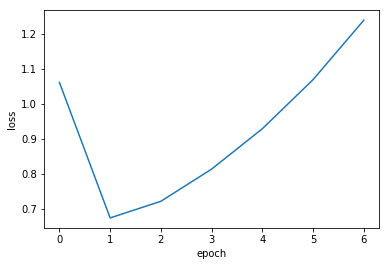

In [23]:
 train_pytorch_ch7(optim.SGD, {"lr": 1}, features, labels, 1500,6)

In [7]:
 train_pytorch_ch7(optim.SGD, {"lr": 0.05}, features, labels, 10)

loss : 0.246613 ,0.041003 sec per epoch


In [6]:
data_iter = torch.utils.data.DataLoader(torch.utils.data.TensorDataset(
    features, labels),10,shuffle=True)